### Introduction

This research aims to explore the relationship between economic growth and Olympic success by examining the trends in GDP share and medal counts for the United States and China over several decades. By analyzing data on GDP share of the world, proportion of total medals and proportion of gold medals, we seek to understand how economic power influences a nation's performance in the Olympics. This study leverages historical data and correlation analysis to draw connections between economic resources and athletic achievements, providing insights into how countries can leverage their economic strength to enhance their global sporting presence. The findings highlight the significant impact of economic growth on a nation's ability to excel in international competitions, particularly in the context of the Olympics.
Source of Olympic Data: https://www.kaggle.com/code/hamdallak/125-years-of-summer-olympics-analysis-visual/notebook
Source of GDP Data: https://fred.stlouisfed.org/series/GDP#0

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
medals = pd.read_csv(r"..\olympics\Country_Medals.csv", encoding= 'unicode_escape')

In [3]:
medals.head()

,Year;Country_Code;Country_Name;Host_city;Host_country;Gold;Silver;Bronze
0,1932;(USA);United States;Los Angeles;United St...
1,1932;(ITA);Italy;Los Angeles;United States;12;...
2,1932;(FRA);France;Los Angeles;United States;10...
3,1932;(SWE);Sweden;Los Angeles;United States;9;5;9
4,1932;(JPN);Japan;Los Angeles;United States;7;7;4


In [4]:
medals = medals.rename(columns = {'Year;Country_Code;Country_Name;Host_city;Host_country;Gold;Silver;Bronze': 'all_data'}, inplace = False)

In [5]:
medals.head()

,all_data
0,1932;(USA);United States;Los Angeles;United St...
1,1932;(ITA);Italy;Los Angeles;United States;12;...
2,1932;(FRA);France;Los Angeles;United States;10...
3,1932;(SWE);Sweden;Los Angeles;United States;9;5;9
4,1932;(JPN);Japan;Los Angeles;United States;7;7;4


In [6]:
'Year;Country_Code;Country_Name;Host_city;Host_country;Gold;Silver;Bronze'.split(';')

['Year',
 'Country_Code',
 'Country_Name',
 'Host_city',
 'Host_country',
 'Gold',
 'Silver',
 'Bronze']

In [7]:
'Year;Country_Code;Country_Name;Host_city;Host_country;Gold;Silver;Bronze'.split(';')[0]

'Year'

In [8]:
def year(x):
    return x.split(';')[0]

def Country_Code(x):
    return x.split(';')[1]

def Country_Name(x):
    return x.split(';')[2]

def Host_city(x):
    return x.split(';')[3]

def Host_country(x):
    return x.split(';')[4]

def Gold(x):
    return x.split(';')[5]

def Silver(x):
    return x.split(';')[6]

def Bronze(x):
    return x.split(';')[7]


In [9]:
medals['year']=medals['all_data'].apply(year)
medals['Country_Code']=medals['all_data'].apply(Country_Code)
medals['Country_Name']=medals['all_data'].apply(Country_Name)
medals['Host_city']=medals['all_data'].apply(Host_city)
medals['Host_country']=medals['all_data'].apply(Host_country)
medals['Gold']=medals['all_data'].apply(Gold)
medals['Silver']=medals['all_data'].apply(Silver)
medals['Bronze']=medals['all_data'].apply(Bronze)

In [10]:
medals.head()

,all_data,year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze
0,1932;(USA);United States;Los Angeles;United St...,1932,(USA),United States,Los Angeles,United States,41,32,30
1,1932;(ITA);Italy;Los Angeles;United States;12;...,1932,(ITA),Italy,Los Angeles,United States,12,12,12
2,1932;(FRA);France;Los Angeles;United States;10...,1932,(FRA),France,Los Angeles,United States,10,5,4
3,1932;(SWE);Sweden;Los Angeles;United States;9;5;9,1932,(SWE),Sweden,Los Angeles,United States,9,5,9
4,1932;(JPN);Japan;Los Angeles;United States;7;7;4,1932,(JPN),Japan,Los Angeles,United States,7,7,4


In [11]:
medals=medals.drop(['all_data'],axis=1)

In [12]:
medals

,year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze
0,1932,(USA),United States,Los Angeles,United States,41,32,30
1,1932,(ITA),Italy,Los Angeles,United States,12,12,12
2,1932,(FRA),France,Los Angeles,United States,10,5,4
3,1932,(SWE),Sweden,Los Angeles,United States,9,5,9
4,1932,(JPN),Japan,Los Angeles,United States,7,7,4
...,...,...,...,...,...,...,...,...
1339,1936,(MEX),Mexico,Berlin,Germany,0,0,3
1340,1936,(BEL),Belgium,Berlin,Germany,0,0,2
1341,1936,(AUS),Australia,Berlin,Germany,0,0,1
1342,1936,(PHI),Philippines,Berlin,Germany,0,0,1


In [13]:
medals.shape

(1344, 8)

In [14]:
medals.dtypes

year            object
Country_Code    object
Country_Name    object
Host_city       object
Host_country    object
Gold            object
Silver          object
Bronze          object
dtype: object

In [15]:
medals['Gold']=medals['Gold'].astype(int)
medals['Silver']=medals['Silver'].astype(int)
medals['Bronze']=medals['Bronze'].astype(int)
medals['year']=medals['year'].astype(int)
medals['Total']=medals['Gold']+medals['Silver']+medals['Bronze']

In [16]:
medals.dtypes

year             int32
Country_Code    object
Country_Name    object
Host_city       object
Host_country    object
Gold             int32
Silver           int32
Bronze           int32
Total            int32
dtype: object

In [17]:
medals['Country_Name'].unique()

array(['United States', 'Italy', 'France', 'Sweden', 'Japan', 'Hungary',
       'Finland', 'Great Britain', 'Germany', 'Australia', 'Argentina',
       'Canada', 'Netherlands', 'Poland', 'South Africa', 'Ireland',
       'Czechoslovakia', 'Austria', 'India', 'Denmark', 'Mexico',
       'Latvia', 'New Zealand', 'Switzerland', 'Philippines', 'Spain',
       'Uruguay', 'Estonia', 'Egypt', 'Norway', 'Yugoslavia', 'Belgium',
       'Chile', 'Haiti', 'Portugal', 'Romania', 'Brazil', 'Greece',
       'Luxembourg', 'Australasia', 'Russian Empire', 'Bohemia', 'Cuba',
       'Mixed team', 'West Germany', 'China', 'South Korea', 'Morocco',
       'Kenya', 'Pakistan', 'Jamaica', 'Nigeria', 'Puerto Rico',
       'Colombia', 'Ivory Coast', 'Peru', 'Syria', 'Thailand', 'Turkey',
       'Venezuela', 'Algeria', 'Cameroon', 'Chinese Taipei',
       'Dominican Republic', 'Iceland', 'Zambia', 'Soviet Union',
       'East Germany', 'Bulgaria', 'Ethiopia', 'Zimbabwe', 'North Korea',
       'Mongolia', 'Tanz

In [18]:
medals['Country_Name'] = medals['Country_Name'].replace('Republic of China', 'China')

In [19]:
medals['Country_Name'].unique()

array(['United States', 'Italy', 'France', 'Sweden', 'Japan', 'Hungary',
       'Finland', 'Great Britain', 'Germany', 'Australia', 'Argentina',
       'Canada', 'Netherlands', 'Poland', 'South Africa', 'Ireland',
       'Czechoslovakia', 'Austria', 'India', 'Denmark', 'Mexico',
       'Latvia', 'New Zealand', 'Switzerland', 'Philippines', 'Spain',
       'Uruguay', 'Estonia', 'Egypt', 'Norway', 'Yugoslavia', 'Belgium',
       'Chile', 'Haiti', 'Portugal', 'Romania', 'Brazil', 'Greece',
       'Luxembourg', 'Australasia', 'Russian Empire', 'Bohemia', 'Cuba',
       'Mixed team', 'West Germany', 'China', 'South Korea', 'Morocco',
       'Kenya', 'Pakistan', 'Jamaica', 'Nigeria', 'Puerto Rico',
       'Colombia', 'Ivory Coast', 'Peru', 'Syria', 'Thailand', 'Turkey',
       'Venezuela', 'Algeria', 'Cameroon', 'Chinese Taipei',
       'Dominican Republic', 'Iceland', 'Zambia', 'Soviet Union',
       'East Germany', 'Bulgaria', 'Ethiopia', 'Zimbabwe', 'North Korea',
       'Mongolia', 'Tanz

In [20]:
medals.head(2)

,year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze,Total
0,1932,(USA),United States,Los Angeles,United States,41,32,30,103
1,1932,(ITA),Italy,Los Angeles,United States,12,12,12,36


In [21]:
# Step 2: Group by 'year' and sum the 'Total' column
total_medals_per_year = medals.groupby('year')['Total'].sum().reset_index()

# Rename the 'Total' column to 'Total_Medals' for clarity
total_medals_per_year.rename(columns={'Total': 'Total_Medals_Year'}, inplace=True)

print (total_medals_per_year)


    year  Total_Medals_Year
0   1896                122
1   1900                284
2   1904                280
3   1908                324
4   1912                317
5   1920                445
6   1924                378
7   1928                327
8   1932                346
9   1936                388
10  1948                411
11  1952                459
12  1956                469
13  1960                461
14  1964                504
15  1968                527
16  1972                600
17  1976                613
18  1980                631
19  1984                688
20  1988                739
21  1992                815
22  1996                842
23  2000                927
24  2004                927
25  2008                958
26  2012                960
27  2016                973
28  2020               1080


In [22]:
# Step 1: Group by 'year' and sum the 'Gold' column
total_gold_medals_per_year = medals.groupby('year')['Gold'].sum().reset_index()

# Rename the 'Gold' column to 'Total_Gold_Medals' for clarity
total_gold_medals_per_year.rename(columns={'Gold': 'Total_Gold_Year'}, inplace=True)

print(total_gold_medals_per_year)


    year  Total_Gold_Year
0   1896               43
1   1900               96
2   1904               97
3   1908              110
4   1912              108
5   1920              157
6   1924              126
7   1928              110
8   1932              116
9   1936              130
10  1948              138
11  1952              149
12  1956              153
13  1960              152
14  1964              163
15  1968              174
16  1972              195
17  1976              198
18  1980              204
19  1984              226
20  1988              241
21  1992              260
22  1996              271
23  2000              300
24  2004              301
25  2008              302
26  2012              302
27  2016              307
28  2020              340


In [23]:
# Step 3: Merge the total gold medals per year with medals2
medals = medals.merge(total_gold_medals_per_year, on='year', how='left')

# Step 4: Merge the total medals per year with medals2
medals = medals.merge(total_medals_per_year, on='year', how='left')



In [24]:
# Display the resulting DataFrame
medals.sort_values('year')

,year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze,Total,Total_Gold_Year,Total_Medals_Year
182,1896,(GRE),Greece,Athens,Greece,10,18,19,47,43,122
191,1896,(ZZX),Mixed team,Athens,Greece,1,0,1,2,43,122
190,1896,(SUI),Switzerland,Athens,Greece,1,2,0,3,43,122
189,1896,(DEN),Denmark,Athens,Greece,1,2,3,6,43,122
188,1896,(AUS),Australia,Athens,Greece,2,0,0,2,43,122
...,...,...,...,...,...,...,...,...,...,...,...
558,2020,(COL),Colombia,Tokyo,Japan,0,4,1,5,340,1080
560,2020,(DOM),Dominican Republic,Tokyo,Japan,0,3,2,5,340,1080
561,2020,(ARM),Armenia,Tokyo,Japan,0,2,2,4,340,1080
551,2020,(EST),Estonia,Tokyo,Japan,1,0,1,2,340,1080


In [25]:
medals2 = medals[(medals['Country_Name'] == 'United States') | 
                 (medals['Country_Name'] == 'China') | 
                 (medals['Country_Name'] == 'Great Britain')|
                 (medals['Country_Name'] == 'Japan')|
                 (medals['Country_Name'] == 'France')].drop(['Country_Code', 'Host_city', 'Host_country', 'Silver', 'Bronze'], axis = 1).sort_values(['year'],                                                                                                  ascending=True)

In [26]:
medals2

,year,Country_Name,Gold,Total,Total_Gold_Year,Total_Medals_Year
185,1896,Great Britain,2,7,43,122
184,1896,France,5,11,43,122
181,1896,United States,11,20,43,122
161,1900,United States,19,48,96,284
162,1900,Great Britain,15,32,96,284
...,...,...,...,...,...,...
500,2020,France,10,33,340,1080
496,2020,Great Britain,22,65,340,1080
495,2020,Japan,27,58,340,1080
494,2020,China,38,88,340,1080


In [27]:
medals2['Gold/Total_Gold_Year']=round(medals2['Gold']/medals2['Total_Gold_Year'],2)
medals2['Total/Total_Medals_Year']= round(medals2['Total']/medals2['Total_Medals_Year'],2)

In [28]:
medals2

,year,Country_Name,Gold,Total,Total_Gold_Year,Total_Medals_Year,Gold/Total_Gold_Year,Total/Total_Medals_Year
185,1896,Great Britain,2,7,43,122,0.05,0.06
184,1896,France,5,11,43,122,0.12,0.09
181,1896,United States,11,20,43,122,0.26,0.16
161,1900,United States,19,48,96,284,0.20,0.17
162,1900,Great Britain,15,32,96,284,0.16,0.11
...,...,...,...,...,...,...,...,...
500,2020,France,10,33,340,1080,0.03,0.03
496,2020,Great Britain,22,65,340,1080,0.06,0.06
495,2020,Japan,27,58,340,1080,0.08,0.05
494,2020,China,38,88,340,1080,0.11,0.08


### When China Got the First Medal

In [29]:
medals[medals['Country_Name']=='China'].sort_values('year')

,year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze,Total,Total_Gold_Year,Total_Medals_Year
485,1960,(ROC),China,Rome,Italy,0,1,0,1,152,461
407,1968,(ROC),China,Mexico City,Mexico,0,0,1,1,174,527
195,1984,(CHN),China,Los Angeles,United States,15,8,9,32,226,688
1152,1988,(CHN),China,Seoul,South Korea,5,11,12,28,241,739
1081,1992,(CHN),China,Barcelona,Spain,16,22,16,54,260,815
1002,1996,(CHN),China,Atlanta,United States,16,22,12,50,271,842
921,2000,(CHN),China,Sydney,Australia,28,16,14,58,300,927
846,2004,(CHN),China,Athens,Greece,32,17,14,63,301,927
758,2008,(CHN),China,Beijing,China,48,22,30,100,302,958
673,2012,(CHN),China,London,Great Britain,38,31,22,91,302,960


In [30]:
medals3= medals2[medals2['year'] >= 1960]

In [31]:
medals3

,year,Country_Name,Gold,Total,Total_Gold_Year,Total_Medals_Year,Gold/Total_Gold_Year,Total/Total_Medals_Year
473,1960,France,0,5,152,461,0.00,0.01
460,1960,Great Britain,2,20,152,461,0.01,0.04
456,1960,Japan,4,18,152,461,0.03,0.04
450,1960,United States,34,71,152,461,0.22,0.15
485,1960,China,0,1,152,461,0.00,0.00
...,...,...,...,...,...,...,...,...
500,2020,France,10,33,340,1080,0.03,0.03
496,2020,Great Britain,22,65,340,1080,0.06,0.06
495,2020,Japan,27,58,340,1080,0.08,0.05
494,2020,China,38,88,340,1080,0.11,0.08


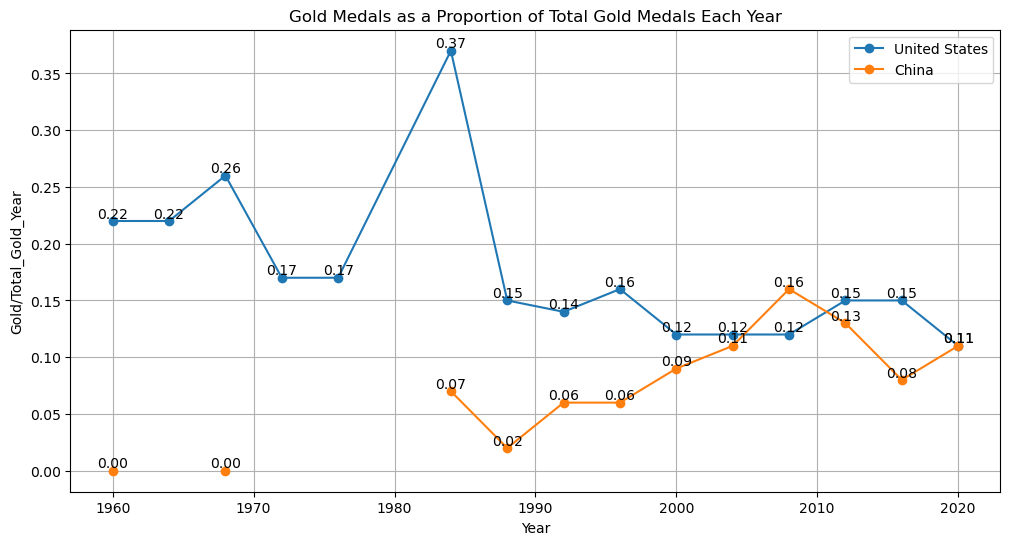

In [32]:
# Filter the data for China and the United States
filtered_data = medals3[(medals3['Country_Name'] == 'China') | (medals3['Country_Name'] == 'United States')]
# Pivot the data to have years as the index and countries as columns for the 'Gold/Total_Gold_Year' ratio
pivot_data = filtered_data.pivot(index='year', columns='Country_Name', values='Gold/Total_Gold_Year')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(pivot_data.index, pivot_data['United States'], label='United States', marker='o')
plt.plot(pivot_data.index, pivot_data['China'], label='China', marker='o')

# Add titles and labels
plt.title('Gold Medals as a Proportion of Total Gold Medals Each Year')
plt.xlabel('Year')
plt.ylabel('Gold/Total_Gold_Year')
plt.legend()

# Annotate each point with its y-value
for year in pivot_data.index:
    if not pd.isna(pivot_data['China'][year]):
        plt.text(year, pivot_data['China'][year], f'{pivot_data["China"][year]:.2f}', ha='center', va='bottom')
    if not pd.isna(pivot_data['United States'][year]):
        plt.text(year, pivot_data['United States'][year], f'{pivot_data["United States"][year]:.2f}', ha='center', va='bottom')

# Show the plot
plt.grid(True)
plt.show()

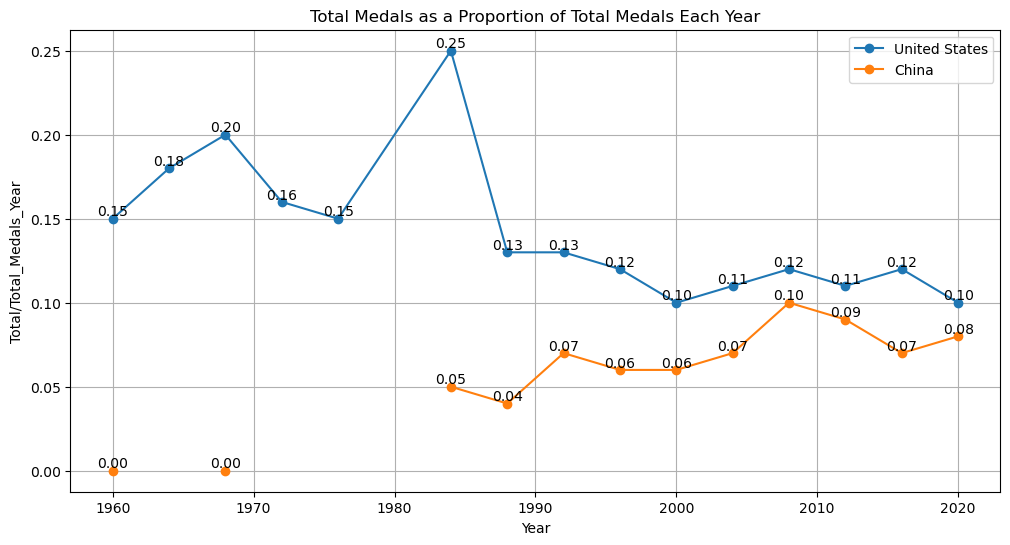

In [33]:
# Filter the data for China and the United States
filtered_data = medals3[(medals3['Country_Name'] == 'China') | (medals3['Country_Name'] == 'United States')]
# Pivot the data to have years as the index and countries as columns for the 'Gold/Total_Gold_Year' ratio
pivot_data = filtered_data.pivot(index='year', columns='Country_Name', values='Total/Total_Medals_Year')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(pivot_data.index, pivot_data['United States'], label='United States', marker='o')
plt.plot(pivot_data.index, pivot_data['China'], label='China', marker='o')

# Add titles and labels
plt.title('Total Medals as a Proportion of Total Medals Each Year')
plt.xlabel('Year')
plt.ylabel('Total/Total_Medals_Year')
plt.legend()

# Annotate each point with its y-value
for year in pivot_data.index:
    if not pd.isna(pivot_data['China'][year]):
        plt.text(year, pivot_data['China'][year], f'{pivot_data["China"][year]:.2f}', ha='center', va='bottom')
    if not pd.isna(pivot_data['United States'][year]):
        plt.text(year, pivot_data['United States'][year], f'{pivot_data["United States"][year]:.2f}', ha='center', va='bottom')

# Show the plot
plt.grid(True)
plt.show()

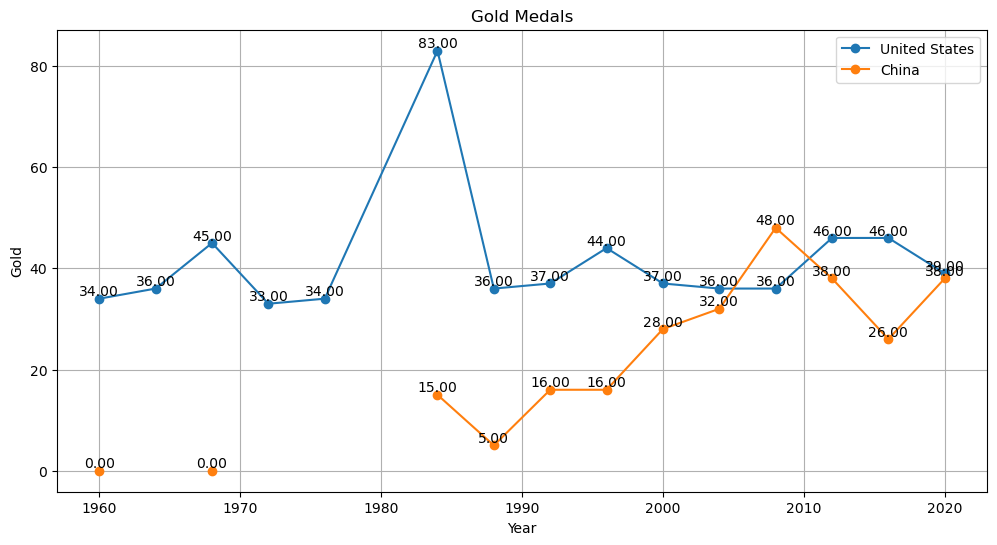

In [34]:
# Filter the data for China and the United States
filtered_data = medals3[(medals3['Country_Name'] == 'China') | (medals3['Country_Name'] == 'United States')]
# Pivot the data to have years as the index and countries as columns for the 'Gold/Total_Gold_Year' ratio
pivot_data = filtered_data.pivot(index='year', columns='Country_Name', values='Gold')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(pivot_data.index, pivot_data['United States'], label='United States', marker='o')
plt.plot(pivot_data.index, pivot_data['China'], label='China', marker='o')

# Add titles and labels
plt.title('Gold Medals')
plt.xlabel('Year')
plt.ylabel('Gold')
plt.legend()

# Annotate each point with its y-value
for year in pivot_data.index:
    if not pd.isna(pivot_data['China'][year]):
        plt.text(year, pivot_data['China'][year], f'{pivot_data["China"][year]:.2f}', ha='center', va='bottom')
    if not pd.isna(pivot_data['United States'][year]):
        plt.text(year, pivot_data['United States'][year], f'{pivot_data["United States"][year]:.2f}', ha='center', va='bottom')

# Show the plot
plt.grid(True)
plt.show()

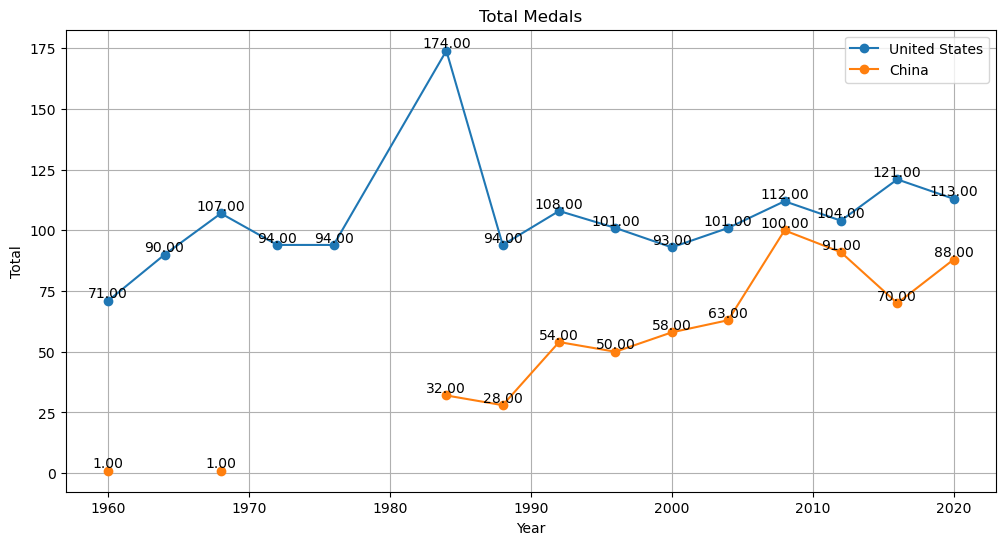

In [35]:
# Filter the data for China and the United States
filtered_data = medals3[(medals3['Country_Name'] == 'China') | (medals3['Country_Name'] == 'United States')]
# Pivot the data to have years as the index and countries as columns for the 'Gold/Total_Gold_Year' ratio
pivot_data = filtered_data.pivot(index='year', columns='Country_Name', values='Total')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(pivot_data.index, pivot_data['United States'], label='United States', marker='o')
plt.plot(pivot_data.index, pivot_data['China'], label='China', marker='o')

# Add titles and labels
plt.title('Total Medals')
plt.xlabel('Year')
plt.ylabel('Total')
plt.legend()

# Annotate each point with its y-value
for year in pivot_data.index:
    if not pd.isna(pivot_data['China'][year]):
        plt.text(year, pivot_data['China'][year], f'{pivot_data["China"][year]:.2f}', ha='center', va='bottom')
    if not pd.isna(pivot_data['United States'][year]):
        plt.text(year, pivot_data['United States'][year], f'{pivot_data["United States"][year]:.2f}', ha='center', va='bottom')

# Show the plot
plt.grid(True)
plt.show()

In [36]:
medals2[medals2['year'] == 1984]

,year,Country_Name,Gold,Total,Total_Gold_Year,Total_Medals_Year,Gold/Total_Gold_Year,Total/Total_Medals_Year
195,1984,China,15,32,226,688,0.07,0.05
192,1984,United States,83,174,226,688,0.37,0.25
202,1984,Great Britain,5,37,226,688,0.02,0.05
203,1984,France,5,28,226,688,0.02,0.04
198,1984,Japan,10,32,226,688,0.04,0.05


In [37]:
gdp_ratios_data = pd.read_csv(r"C:\Users\lasra\Desktop\olympics\GDP_Ratios_Transformed_and_Merged.csv", encoding= 'unicode_escape')

In [38]:
gdp_ratios_data.dtypes

year                    int64
gdp_share_of_world    float64
country                object
dtype: object

In [39]:
gdp_ratios_data.head()

,year,gdp_share_of_world,country
0,1960,0.40,United States
1,1961,0.39,United States
2,1962,0.39,United States
3,1963,0.38,United States
4,1964,0.37,United States


In [40]:
medals4 = medals3[(medals3['Country_Name'] == 'China') | (medals3['Country_Name'] == 'United States')]

In [41]:
# Merge the datasets
merged_data = pd.merge(medals4, gdp_ratios_data, left_on=['year', 'Country_Name'], right_on=['year', 'country'], how='left')

In [42]:
merged_data

,year,Country_Name,Gold,Total,Total_Gold_Year,Total_Medals_Year,Gold/Total_Gold_Year,Total/Total_Medals_Year,gdp_share_of_world,country
0,1960,United States,34,71,152,461,0.22,0.15,0.40,United States
1,1960,China,0,1,152,461,0.00,0.00,0.04,China
2,1964,United States,36,90,163,504,0.22,0.18,0.37,United States
3,1968,China,0,1,174,527,0.00,0.00,0.03,China
4,1968,United States,45,107,174,527,0.26,0.20,0.38,United States
5,1972,United States,33,94,195,600,0.17,0.16,0.33,United States
6,1976,United States,34,94,198,613,0.17,0.15,0.29,United States
7,1984,China,15,32,226,688,0.07,0.05,0.02,China
8,1984,United States,83,174,226,688,0.37,0.25,0.32,United States
9,1988,China,5,28,241,739,0.02,0.04,0.02,China


In [43]:
# Ensure the columns are present and relevant
relevant_columns = ['gdp_share_of_world', 'Gold/Total_Gold_Year', 'Total/Total_Medals_Year']

# Calculate the correlation matrix
correlation_matrix = merged_data[relevant_columns].corr()

In [44]:
correlation_matrix

,gdp_share_of_world,Gold/Total_Gold_Year,Total/Total_Medals_Year
gdp_share_of_world,1.000000,0.767200,0.845472
Gold/Total_Gold_Year,0.767200,1.000000,0.963425
Total/Total_Medals_Year,0.845472,0.963425,1.000000


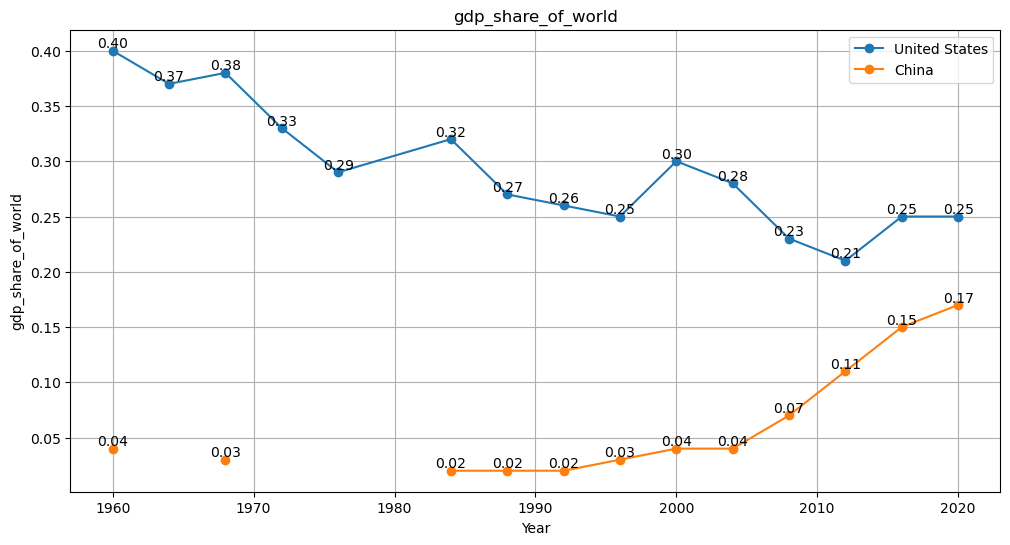

In [45]:
# Filter the data for China and the United States
filtered_data = merged_data[(merged_data['Country_Name'] == 'China') | (merged_data['Country_Name'] == 'United States')]
# Pivot the data to have years as the index and countries as columns for the 'Gold/Total_Gold_Year' ratio
pivot_data = filtered_data.pivot(index='year', columns='Country_Name', values='gdp_share_of_world')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(pivot_data.index, pivot_data['United States'], label='United States', marker='o')
plt.plot(pivot_data.index, pivot_data['China'], label='China', marker='o')

# Add titles and labels
plt.title('gdp_share_of_world')
plt.xlabel('Year')
plt.ylabel('gdp_share_of_world')
plt.legend()

# Annotate each point with its y-value
for year in pivot_data.index:
    if not pd.isna(pivot_data['China'][year]):
        plt.text(year, pivot_data['China'][year], f'{pivot_data["China"][year]:.2f}', ha='center', va='bottom')
    if not pd.isna(pivot_data['United States'][year]):
        plt.text(year, pivot_data['United States'][year], f'{pivot_data["United States"][year]:.2f}', ha='center', va='bottom')

# Show the plot
plt.grid(True)
plt.show()

### Trends in Medals
#### Proportion of Total Medals Each Year

- **United States**: The proportion of total medals won by the United States shows variability but remains relatively stable, indicating consistent overall performance at the Olympics. Despite some fluctuations, there is no clear long-term downtrend.
- **China**: The proportion of total medals won by China shows a clear upward trend, demonstrating improved overall performance at the Olympics in line with its economic growth. This consistent increase reflects China's growing competitive edge on the global stage.

#### Proportion of Gold Medals Each Year

- **United States**: The proportion of gold medals won by the United States exhibits some decline or stabilization at lower levels compared to historical peaks. While the United States continues to win a significant share of gold medals, there is a noticeable decrease from earlier years.
- **China**: The proportion of gold medals won by China is on a clear upward trend, reflecting significant improvements in their Olympic performance. This upward trend aligns with China's economic rise.

These observations confirm that while the US may have some variability and a potential downtrend in gold medals, its total medal count remains strong. In contrast, China is experiencing a consistent and significant upward trend in both gold and total medals.

### Trends in GDP Share of the World

- **United States**: The GDP share of the United States shows a clear long-term downtrend, decreasing from 40% in 1960 to 25% in 2020. This reflects a relative decline in economic dominance over the period.
- **China**: The GDP share of China is on a significant upward trend, growing from a negligible percentage in 1960 to 17% in 2020. This dramatic increase reflects China's rapid economic growth and rising global economic influence.

### Economic Growth and Olympic Success

- **Correlation Analysis**: The correlation matrix highlights strong positive correlations between the variables. Notably, there is a 0.77 correlation between GDP share of the world and the proportion of gold medals each year, indicating a potential link between economic power and Olympic success.

- **Economic Influence**: The data suggests a correlation between a country's economic power and its Olympic success. The United States, with a high GDP share, consistently wins more medals, while China’s rising GDP correlates with its increased medal counts.

- **Historical Performance**: The United States had a strong Olympic presence from 1960 to 2000. China's performance significantly improved post-2000, aligning with its economic growth.

### Conclusion
The analysis underscores the interplay between economic power and sports success. Both the United States and China demonstrate that robust economic resources can enhance a nation's Olympic performance.